# 8. Important packages

There are about 1400 packages available via **conda** and about 113.000 using **pip**. You will understand that we can't cover all of them. So here we will have a quick look at a few selected packages.

## 8.1 `pickle`

`pickle` is part of base Python. So you don't have to install it. Is used to serialize and deserialize Python objects. In other words, `pickling` means to transform an object into a long sequence of 0s and 1s and save it on the hard drive. The other way around, `unpickling` means to transform a byte-stream back to a python object. 

If you want to save data, intermediary analysis steps or any Python object, use `pickle`.

There are really only two functions in pickle you need: `pickle.dump()` and `pickle.load()` each of these needs a handle to file that was opened in binary mode.
Remember how you can open a file with read or write permission:

```
fr = fopen('read_file.txt', 'r');
fw = fopen('write_file.txt','w');
```
And afterwards you shouldn't forget to close the file using `fclose`. We'll use a [context manager](https://www.geeksforgeeks.org/context-manager-in-python/) for this. It means, the file is automatically closed for us. 

To `pickle an object` into a **.pic**-file, do the following:

```Python
data = [1,2,3];
with open( 'picfile.pic', 'wb' ) as file:
    pickle.dump( data, file, -1);
```
The `-1` tells `pickle` to use the highest available protocol.

`Unpickling` works nearly the same. Of course, you need binary mode reading permission instead of writing permission.

**Exercise**

Unpickle the mysterious string from "..\toy_data".

In [2]:
#your code here


## 8.2 Numpy

Here's a somewhat controversial quote on the relationsship between MATLAB and numpy and R and pandas:

<img align="center" src='../img/pandas_r_numpy_matlab.PNG' width=60%/>

That's pretty much true. Numpy is the package that makes scientific computing in Python possible to begin with. You will probably import in into every script and module you write. It provides important data types like `numpy.arrays`, that are similar to MATLAB arrays. 

If you prefer R-style DataFrames, you can go with `pandas`. It's very widely used in Data Science. In the background it's a very convenient wrapper around numpy. 
I use pandas a lot because of its improved functionality. Because of time constraints we'll just have a look at numpy here. You can find a 10 minute intro to pandas [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html).


The convention to import numpy is this:

```Python
import numpy as np
```
You also find
```Python
from numpy import *
```
but I advise against using this approach. Namespaces are a good thing.


In [5]:
import numpy as np

### 8.2.1 Numpy arrays

The most important aspect of numpy is to provide us with a data type that is able to hold numeric data like SCR, eyetracking, ratings or fMRI. Numpy is used by nearly all other packages that you will use like `scipy` and `matplotlib`. As usually, you can use the class `np.array` as a constructor to transform other data types into numpy arrays.

**Exercise**

Transform the following list of lists into a np.array

In [ ]:
data = [[1,0,0],[0,1,0],[0,0,1]];
#your code here


Other numpy functions like random number generators also return np.arrays. 

**Exercise**

   1. Use np.random.randn to create a 10x2 array of standard normal distributed values.
   2. Scalar multiplication and addition work like in MATLAB. Turn the created array into IQ values using this knowledge. (IQ values have mean 100 and SD 15)
   3. np.arrays are objects. They have methods. Use this knowledge to write a function that takes an array as input and z-scores the array column-wise.

In [5]:
#your code here


You can use slices for indexing. They behave like the indexes you already know from Python, i.e. 0-based and the end point is not included.

**Exercise**

Print the second row of the IQ matrix. Then print the first five rows of the second column.

In [1]:
#your code here


#### 8.2.1.1 Matrix algebra

The `*`-operator uses matrix multiplication by default. The same operator in Python does not. Python 3.5 introduced the `@`-operator for this purpose. This also shows the meaning of numpy for the Python universe.

The following are nonsense examples.

Assuming the relation y = **X**betas + e, compute y-hat from the following matrix X (data) and vector betas (regression weights) using matrix multiplication.

In [ ]:
betas = np.array([[1.4],[0.4],[0.98]]); # this is needed to create to create a column vector
X = np.random.randint(1,100, (100,3));

In [33]:
#your code here


Subtraction and addition work the same as in MATLAB. As long as the shapes can be broadcasted together.

**Exercise**

Compute the error between your computed y_hat and the following "empirical" y:

In [30]:
y = np.random.randn(100,1) * 50 + 145;

In [31]:
#your code here


For basic operations on the data, np.arrays provide methods, e.g. `array.sum()`.

**Exercise**

Compute the sum of squared residuals. *Hint*: Yyou can do it in one line.

In [8]:
#your code here


Theres's a ton of more functions that arrays provide you with. If you use tab completion to get an idea about the amount, you'll understand that we can't cover all. However, we can cover one pitfall:

<br/>

#### 8.2.1.2 Fortran order vs. C order

Fortran and C define different standards about how arrays are stored in memory: [Row-major and column-major order](https://en.wikipedia.org/wiki/Row-_and_column-major_order) respectively. That's basically, when you use `matrix(:)` in MATLAB, do you glue rows together or columns? Fortran and MATLAB are column-dominant. C and numpy are row-dominant.

Have a look:

**Exercise**

   1. Use `np.arange` to create a vector of values from 1 to 25. `np.arange` works like `range()`, except it returns a np.array.
   2. Use the array method `array.reshape()` to reshape it into a 5,5-matrix. 
   3. What would you expect? Print the array.


In [ ]:
#your code here


The same problem arises for `array.ravel()` and `array.flatten()`, that act similar ([but not identical](https://stackoverflow.com/questions/28930465/what-is-the-difference-between-flatten-and-ravel-functions-in-numpy)). Fortunately, there is a way around this. All of these functions take an optional parameter `order`. You can pass either `'C'`, for row-major order of `'F'` for column-major, Fotran/MATLAB-like order.

**Exercises**

Use `ravel` or `flatten` to reshape the matrix into a vector, using column-major order.

In [35]:
#your code here


Numpy is obviously inspired by MATLAB. Some functions are the same. Among them e.g. `linspace`. Others have close analogues. You can find a side-by-side view [here](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Apart from that, you just have to use it to get used to it.

<br/>

## 8.3 Scipy

Scipy is a package that contains classes and functions for a wide range of numerical problems. Among them signal processing, linear algebra, statistics and optimization. We'll have a quick look at the statistics module, but you should know there is more.

In [4]:
from scipy import stats

In [38]:
a = np.random.randn(100,1) + 90;
b = np.random.randn(100,1)  + 95

Assuming, `a` and `b` are independent samples, use a t-test to compute the probability of the observed or a more extreme mean difference under the hypothesis that both samples are drawn from the same population.

In [41]:
#your code here


Scipy.stats also provides classes for probability distributions. You can create instances of these classes like this.

In [42]:
#create an object of a gamma(2,2)-distribution
gamma = stats.gamma(2,2);

<class 'scipy.stats._distn_infrastructure.rv_frozen'>


Now this object can be used to do things like generating random values or computing PDF and CDF. And a lot more.

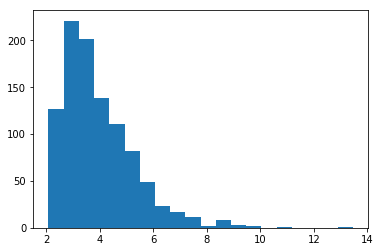

In [48]:
#generate a lot of random values from gamma(2,2)
random_values = gamma.rvs(1000)
#visualize them
import matplotlib.pyplot as plt;
%matplotlib inline
plt.hist(random_values,bins=20);plt.show()

**Exercise** 

Use `stats.norm` to "prove" that for a normal distribution the AUC between -2 and 2 standard deviations is ~95%. *Hint*: Use the cumulative density function.

In [13]:
#your code here


<br/>

## 8.4 Matplotlib

Matplotlib is **the** plotting library in Python. It's designed after MATLAB's plotting. Still, matplotlib is a bit like ggplot, because there are so many ways to customize everything. That means, you can make your plots look like you want them to, but it might take a while and a lot of code. Just like pandas is a wrapper around numpy, there are wrappers around matplotlib. The most prominent one is **seaborn** that tries to use sensible defaults and provide publication-ready figures. 

There are different modules and they provide different ways to use matplotlib. For MATLAB-users there's **pylab**. Its use is discouraged by the creators of matplotlib. The standard module is **pyplot**, which we'll use here. That's kind of like the OOP variant of pylab.

In [2]:
import matplotlib.pyplot as plt
#IPython magic to make sure that plots are shown IN the notebook:
%matplotlib inline

The simplest plot would be something like this:

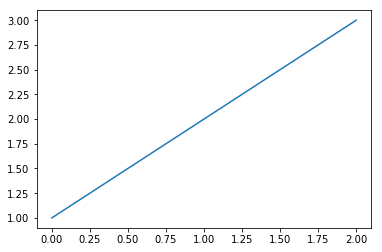

In [15]:
plt.plot( [1,2,3] );
#the following is not necessary here, but since it is in other contexts, you should add it
plt.show()

As you see, the syntax is similar to MATLAB. Even more so:

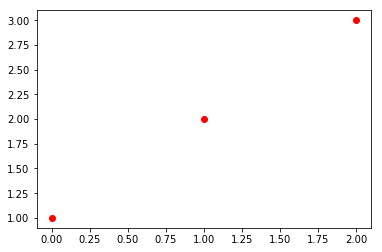

In [16]:
plt.plot( [1,2,3] , 'ro' );
plt.show()

But actually, everything is an object again, so you can also use this approach.


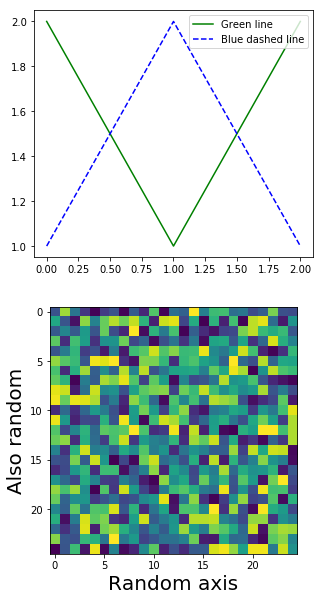

In [7]:
fig = plt.figure( figsize= (5,10)); #create a figure of width 10 x height 20
ax_1 = fig.add_subplot(211); #add first of two subplots that are arranged vertically
ax_2 = fig.add_subplot(212); #add second one

#now these are all objects and provide methods, e.g for plotting
ax_1.plot( [2,1,2], 'g-', label = 'Green line'); #label can be used for the legend;
ax_1.plot( [1,2,1], 'b--', label = 'Blue dashed line');
ax_1.legend() # show the legend

#same as imshow in MATLAB
ax_2.imshow( np.random.randint( 0,100,(25,25)));
ax_2.set_xlabel( 'Random axis', fontsize = 20);
ax_2.set_ylabel('Also random', fontsize=20 );

plt.show()

#you can now directly save the figure
import os
fig.savefig(os.path.abspath('../img/testplot.png'))

<br/>

**Exercise**

Use matplotlib to create three horizontally arranged subplots that all show the cosine, tangens and sine of np.array from 0 to 2 pi.
If you're feeling experimental, use `plt.subplots()`, otherwise stick to the way you just saw.

In [23]:
#your code here


## 8.5 ipdb

`ipdb` is short for IPython debugging. We will only have a look at one function and that's the only one I've ever used. It's also the only one that I've ever used for debugging in Python. You probably have `ipdb` already installed, but if not you can use conda for this. The function is called `set_trace`. It works exactly the same way as `keyboard` works in MATLAB - stop execution of code and give control back for debugging. Let's import it:

from ipdb import set_trace

You can just call it wherever you want to stop for debugging purposes. The three commands you use in MATLAB for debugging aa `dbstep` to proceed one line and then stop again, `dbcont` to proceed until the next debugging point and `dbquit` to quit debugging and stop execution of program. Have a look at the equivalents in Python:

| MATLAB | Python| 
| ------ | ----- |
| dbcont | c     |
| dbstep | n     |
| dbquit | q     |

This is all that's different. The principle is the same. Have a quick look, if you want to:

In [ ]:
for i in range(10):
    print(i);
    set_trace();

That's all you need to change about your debugging procedures. Different commands.

<br/>

# Conclusion

This was barely even scratching the surface. There is **a lot** to be learned about these. But hopefully now you have a rough idea about what you can expect from these packages.
This was the last bit of spoonfeeding. I think you're ready to be pushed into the cold water and learn how to swim. See you in the last notebook.